In [181]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 150

In [182]:
a = 998
b = 1998
c = -999
d = -1999
h = 1 / 1000
X = 1
x = np.arange(0, X, h)
u0 = -3
v0 = 5
solution = np.zeros((x.size, 2))
solution[0] = np.array([u0, v0])
f = lambda _u, _v: np.array([_u * a + b * _v, _u * c + d * _v])


def exact_solution(x):
	u = 2 * (u0 + v0) * np.exp(-x) + (-u0 - 2 * v0) * np.exp(-1000 * x)
	v = - (u0 + v0) * np.exp(-x) - (-u0 - 2 * v0) * np.exp(-1000 * x)
	return np.array([u, v])

## First scheme

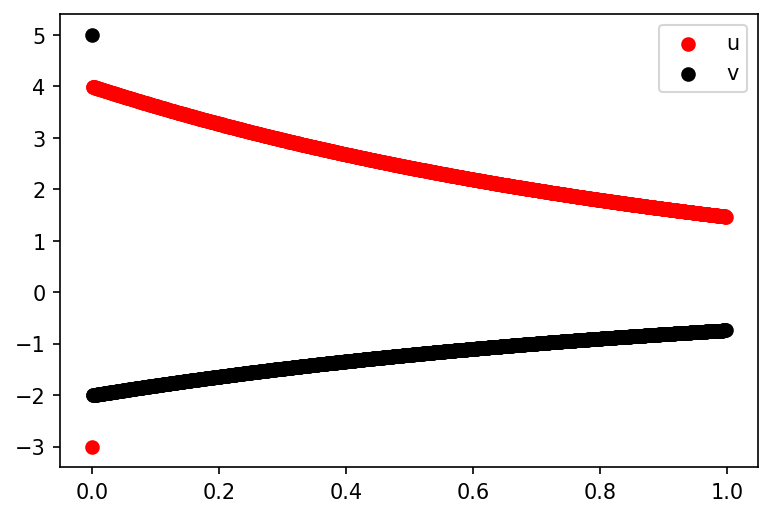

In [183]:
for i in range(x.size - 1):
	solution[i + 1] = solution[i] + h * f(*solution[i])
u = solution[:, 0]
v = solution[:, 1]
plt.scatter(x, u, c='r', label='u')
plt.scatter(x, v, c='k', label='v')
# plt.plot(x, exact_solution(x)[0], ':', label='gt u')
# plt.plot(x, exact_solution(x)[1], ':', label='gt v')
plt.legend(loc='upper right')
plt.show()

## Implicit scheme

In [184]:
implicit_solution = np.zeros((x.size, 2))
implicit_solution[0] = np.array([u0, v0])

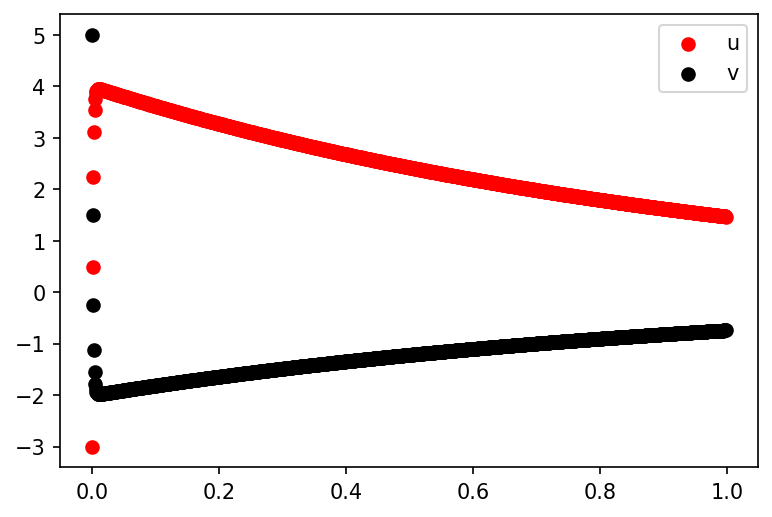

In [185]:
for i in range(x.size - 1):
	# implicit_solution[i + 1] = implicit_solution[i] + h / 2 * f(*implicit_solution[i]) + h / 2 * f(*implicit_solution[i + 1])
	J = np.array([[a, b], [c, d]])
	E = np.eye(2)
	mat = np.linalg.inv(E / h - J)
	implicit_solution[i + 1] = implicit_solution[i] + np.dot(mat, f(*implicit_solution[i]))
implicit_u = implicit_solution[:, 0]
implicit_v = implicit_solution[:, 1]
plt.scatter(x, implicit_u, c='r', label='u')
plt.scatter(x, implicit_v, c='k', label='v')
# plt.plot(x, implicit_u, ':', c='r', label='u')
# plt.plot(x, implicit_v, c='k', label='v')
# plt.plot(x, exact_solution(x)[0], ':', label='gt u')
# plt.plot(x, exact_solution(x)[1], ':', label='gt v')
plt.legend(loc='upper right')
plt.show()

## Second scheme

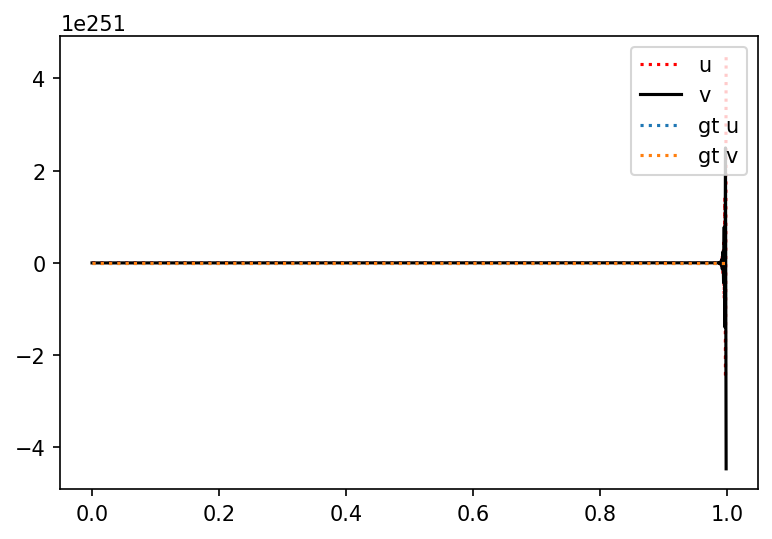

In [186]:
solution = np.zeros((x.size, 2))
solution[0] = np.array([implicit_u[0], implicit_v[0]])

for i in range(x.size - 3):
	solution[i + 3] = solution[i + 2] + h / 12 * (
				23 * f(*solution[i + 2]) - 16 * f(*solution[i + 1]) + 5 * f(*solution[i]))
u = solution[:, 0]
v = solution[:, 1]
plt.plot(x, u, ':', c='r', label='u')
plt.plot(x, v, c='k', label='v')
plt.plot(x, exact_solution(x)[0], ':', label='gt u')
plt.plot(x, exact_solution(x)[1], ':', label='gt v')
plt.legend(loc='upper right')
plt.show()